# Kaggle : New York City Taxi Trip Duration
### Share code and data to improve ride time predictions

https://www.kaggle.com/c/nyc-taxi-trip-duration/kernels

## 1. EDA (Exploratory Data Analysis)

### a. understanding data 
### b. data visualization

In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import seaborn as sns
from ipyleaflet import *
import time
from math import sin, cos, sqrt, atan2, radians
import folium
import folium.plugins as plugins



%matplotlib inline

In [2]:
train = pd.read_csv("~/Documents/taxi_data/train.csv")
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


# unit

### latitude / longtitude = decimal degree (111.32mm per 0.000001°)
- 40.767937° / -73.982155°

### duration = sec
- 455 sec = 7min 35sec

In [3]:
# train.info()

In [4]:
# train.describe()

In [5]:
9.594923e+02

959.4923

In [6]:
np.random.seed(2)
train_sample = train.sample(frac=0.005, replace=True)
train_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7293 entries, 100879 to 1074490
Data columns (total 11 columns):
id                    7293 non-null object
vendor_id             7293 non-null int64
pickup_datetime       7293 non-null object
dropoff_datetime      7293 non-null object
passenger_count       7293 non-null int64
pickup_longitude      7293 non-null float64
pickup_latitude       7293 non-null float64
dropoff_longitude     7293 non-null float64
dropoff_latitude      7293 non-null float64
store_and_fwd_flag    7293 non-null object
trip_duration         7293 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 683.7+ KB


In [7]:
train_sample.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
100879,id0673821,2,2016-03-19 20:53:44,2016-03-19 21:18:11,2,-73.990944,40.732998,-73.944931,40.774727,N,1467
203245,id3465534,2,2016-04-25 14:31:34,2016-04-25 14:37:05,2,-73.982185,40.752148,-73.988281,40.742992,N,331
1133010,id1354600,1,2016-05-04 16:35:10,2016-05-04 16:41:07,1,-73.969307,40.760986,-73.978966,40.747524,N,357
961799,id3014975,1,2016-01-16 10:41:51,2016-01-16 10:56:41,1,-73.986877,40.766727,-73.955513,40.826473,N,890
1102498,id0962434,1,2016-01-14 04:30:56,2016-01-14 04:34:37,1,-73.981865,40.758327,-73.991219,40.750141,N,221


In [8]:
train_sample.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,7293.000000,7293.000000,7293.000000,7293.000000,7293.000000,7293.000000,7293.000000
mean,1.528726,1.667626,-73.973591,40.751095,-73.973485,40.751617,975.675168
std,0.499208,1.326878,0.037878,0.027623,0.036893,0.031980,3415.942518
min,1.000000,1.000000,-74.222603,40.582989,-74.222603,40.556728,2.000000
25%,1.000000,1.000000,-73.991737,40.737495,-73.991188,40.736305,408.000000
50%,2.000000,1.000000,-73.981667,40.754292,-73.979797,40.754429,675.000000
75%,2.000000,2.000000,-73.967194,40.768204,-73.963463,40.769367,1065.000000
max,2.000000,6.000000,-73.776566,40.903709,-73.587265,41.027721,86267.000000


# Feature Engineering / Data Cleaning

- higher than 100 mile/h (160 km/h) is odd data
- longer than 100 mile distance data needs to check out
- less than 5 minutes trip duration data needs to check out

In [9]:
#out of 95 percent value
train_sample1 = pd.DataFrame.quantile(train_sample, q = 0.95)
train_sample1

vendor_id               2.000000
passenger_count         5.000000
pickup_longitude      -73.887389
pickup_latitude        40.787579
dropoff_longitude     -73.919923
dropoff_latitude       40.797626
trip_duration        2101.200000
Name: 0.95, dtype: float64

In [10]:
#out of 5 percent value
train_sample2 = pd.DataFrame.quantile(train_sample, q = 0.05)
train_sample2

vendor_id              1.000000
passenger_count        1.000000
pickup_longitude     -74.006631
pickup_latitude       40.709023
dropoff_longitude    -74.007607
dropoff_latitude      40.700454
trip_duration        185.000000
Name: 0.05, dtype: float64

### Add columns of detailed informations
- duration per min
- datetime per hour
- datetime per day of week
- datetime per month

In [11]:
#train['trip_duration']
#convert duration unit : sec to min
train_sample["pickup_datetime"] =  pd.to_datetime(train_sample["pickup_datetime"])
train_sample["dropoff_datetime"] =  pd.to_datetime(train_sample["dropoff_datetime"])
sample_duration = train_sample["dropoff_datetime"] - train_sample["pickup_datetime"]
sample_duration_sec = sample_duration.dt.total_seconds().astype('int')
train_sample["dur_min"] = (sample_duration_sec / 60).astype('int')
print(train_sample['dur_min'][0:2])

print(train_sample["pickup_datetime"][0:3])
print(train_sample["dropoff_datetime"][0:3])
print(train_sample["dropoff_datetime"][0:3] - train_sample["pickup_datetime"][0:3])

100879    24
203245     5
Name: dur_min, dtype: int64
100879    2016-03-19 20:53:44
203245    2016-04-25 14:31:34
1133010   2016-05-04 16:35:10
Name: pickup_datetime, dtype: datetime64[ns]
100879    2016-03-19 21:18:11
203245    2016-04-25 14:37:05
1133010   2016-05-04 16:41:07
Name: dropoff_datetime, dtype: datetime64[ns]
100879    00:24:27
203245    00:05:31
1133010   00:05:57
dtype: timedelta64[ns]


In [12]:
#day of week
#Monday=0, Sunday=6
train_sample["pick_dayofweek"] = train_sample["pickup_datetime"].dt.dayofweek
train_sample["drop_dayofweek"] = train_sample["dropoff_datetime"].dt.dayofweek
print(train_sample["pick_dayofweek"][0:3])
print(train_sample["drop_dayofweek"][0:3])

100879     5
203245     0
1133010    2
Name: pick_dayofweek, dtype: int64
100879     5
203245     0
1133010    2
Name: drop_dayofweek, dtype: int64


In [13]:
#date by month
train_sample["pick_dayofmonth"] = train_sample["pickup_datetime"].dt.month
train_sample["drop_dayofmonth"] = train_sample["dropoff_datetime"].dt.month
print(train_sample["pick_dayofmonth"][0:3])
print(train_sample["drop_dayofmonth"][0:3])

100879     3
203245     4
1133010    5
Name: pick_dayofmonth, dtype: int64
100879     3
203245     4
1133010    5
Name: drop_dayofmonth, dtype: int64


In [14]:
#date by hour
train_sample["pick_datehour"] = train_sample["pickup_datetime"].dt.hour
train_sample["drop_datehour"] = train_sample["dropoff_datetime"].dt.hour
print(train_sample["pick_datehour"][0:3])
print(train_sample["drop_datehour"][0:3])

100879     20
203245     14
1133010    16
Name: pick_datehour, dtype: int64
100879     21
203245     14
1133010    16
Name: drop_datehour, dtype: int64


In [15]:
train_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7293 entries, 100879 to 1074490
Data columns (total 18 columns):
id                    7293 non-null object
vendor_id             7293 non-null int64
pickup_datetime       7293 non-null datetime64[ns]
dropoff_datetime      7293 non-null datetime64[ns]
passenger_count       7293 non-null int64
pickup_longitude      7293 non-null float64
pickup_latitude       7293 non-null float64
dropoff_longitude     7293 non-null float64
dropoff_latitude      7293 non-null float64
store_and_fwd_flag    7293 non-null object
trip_duration         7293 non-null int64
dur_min               7293 non-null int64
pick_dayofweek        7293 non-null int64
drop_dayofweek        7293 non-null int64
pick_dayofmonth       7293 non-null int64
drop_dayofmonth       7293 non-null int64
pick_datehour         7293 non-null int64
drop_datehour         7293 non-null int64
dtypes: datetime64[ns](2), float64(4), int64(10), object(2)
memory usage: 1.4+ MB


In [16]:
train_sample.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dur_min,pick_dayofweek,drop_dayofweek,pick_dayofmonth,drop_dayofmonth,pick_datehour,drop_datehour
100879,id0673821,2,2016-03-19 20:53:44,2016-03-19 21:18:11,2,-73.990944,40.732998,-73.944931,40.774727,N,1467,24,5,5,3,3,20,21
203245,id3465534,2,2016-04-25 14:31:34,2016-04-25 14:37:05,2,-73.982185,40.752148,-73.988281,40.742992,N,331,5,0,0,4,4,14,14
1133010,id1354600,1,2016-05-04 16:35:10,2016-05-04 16:41:07,1,-73.969307,40.760986,-73.978966,40.747524,N,357,5,2,2,5,5,16,16
961799,id3014975,1,2016-01-16 10:41:51,2016-01-16 10:56:41,1,-73.986877,40.766727,-73.955513,40.826473,N,890,14,5,5,1,1,10,10
1102498,id0962434,1,2016-01-14 04:30:56,2016-01-14 04:34:37,1,-73.981865,40.758327,-73.991219,40.750141,N,221,3,3,3,1,1,4,4


In [17]:
train_sample.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dur_min,pick_dayofweek,drop_dayofweek,pick_dayofmonth,drop_dayofmonth,pick_datehour,drop_datehour
count,7293.000000,7293.000000,7293.000000,7293.000000,7293.000000,7293.000000,7293.000000,7293.000000,7293.000000,7293.000000,7293.000000,7293.000000,7293.000000,7293.000000
mean,1.528726,1.667626,-73.973591,40.751095,-73.973485,40.751617,975.675168,15.768134,3.065679,3.066913,3.535445,3.535993,13.756205,13.746469
std,0.499208,1.326878,0.037878,0.027623,0.036893,0.031980,3415.942518,56.930597,1.953082,1.957423,1.682983,1.683623,6.372602,6.459314
min,1.000000,1.000000,-74.222603,40.582989,-74.222603,40.556728,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,-73.991737,40.737495,-73.991188,40.736305,408.000000,6.000000,1.000000,1.000000,2.000000,2.000000,9.000000,9.000000
50%,2.000000,1.000000,-73.981667,40.754292,-73.979797,40.754429,675.000000,11.000000,3.000000,3.000000,4.000000,4.000000,14.000000,14.000000
75%,2.000000,2.000000,-73.967194,40.768204,-73.963463,40.769367,1065.000000,17.000000,5.000000,5.000000,5.000000,5.000000,19.000000,19.000000
max,2.000000,6.000000,-73.776566,40.903709,-73.587265,41.027721,86267.000000,1437.000000,6.000000,6.000000,6.000000,7.000000,23.000000,23.000000


In [18]:
# train_sample_1 = train_sample.loc[:,["pick_dayofweek","dur_min"]]
# train_sample_1.tail()

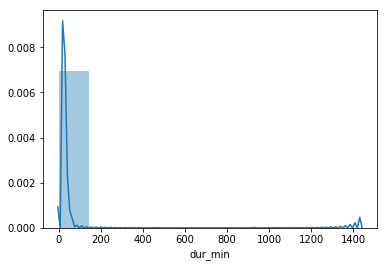

In [19]:
sns.distplot(train_sample["dur_min"], bins = 10)

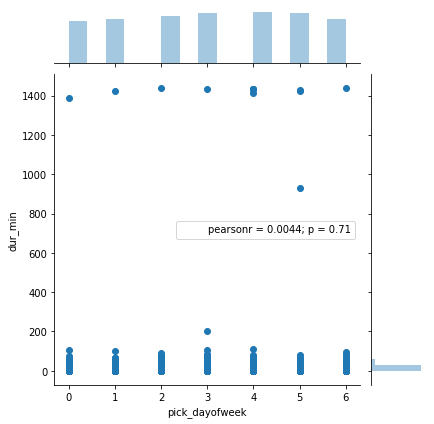

In [20]:
sns.jointplot(x = "pick_dayofweek", y = "dur_min", data = train_sample)

In [21]:
# sns.heatmap(train_sample)

In [22]:
# test = pd.read_csv("~/Documents/taxi_data/test.csv")
# test.head()

# Distance between pickup and dropoff location

In [139]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0

lat1 = radians(40.73299789428711)
lon1 = radians(-73.99094390869139)
lat2 = radians(40.774726867675774)
lon2 = radians(-73.94493103027344)

dlon = lon2 - lon1
dlat = lat2 - lat1

a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))

distance = R * c

print("Result:", distance)
print("Should be:", 278.546, "km")

Result: 6.047700425340195
Should be: 278.546 km


In [138]:
import geopy.distance

coords_1 = (40.73299789428711, -73.99094390869139)
coords_2 = (40.774726867675774, -73.94493103027344)

print(geopy.distance.vincenty(coords_1, coords_2).km)

6.047483994627771


In [137]:
i = 0
print(train_sample.iloc[i,6])
print(train_sample.iloc[i,5])
print(train_sample.iloc[i,8])
print(train_sample.iloc[i,7])


40.73299789428711
-73.99094390869139
40.774726867675774
-73.94493103027344


In [140]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6371.0

dis = []

for i in range(len(train_sample)):
    lat1 = radians(train_sample.iloc[i,6])
    lon1 = radians(train_sample.iloc[i,5])
    lat2 = radians(train_sample.iloc[i,8])
    lon2 = radians(train_sample.iloc[i,7])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    dis.append(distance)
    
train_sample['distance'] = dis

train_sample.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dur_min,pick_dayofweek,drop_dayofweek,pick_dayofmonth,drop_dayofmonth,pick_datehour,drop_datehour,distance
100879,id0673821,2,2016-03-19 20:53:44,2016-03-19 21:18:11,2,-73.990944,40.732998,-73.944931,40.774727,N,1467,24,5,5,3,3,20,21,6.045803
203245,id3465534,2,2016-04-25 14:31:34,2016-04-25 14:37:05,2,-73.982185,40.752148,-73.988281,40.742992,N,331,5,0,0,4,4,14,14,1.140205
1133010,id1354600,1,2016-05-04 16:35:10,2016-05-04 16:41:07,1,-73.969307,40.760986,-73.978966,40.747524,N,357,5,2,2,5,5,16,16,1.703721
961799,id3014975,1,2016-01-16 10:41:51,2016-01-16 10:56:41,1,-73.986877,40.766727,-73.955513,40.826473,N,890,14,5,5,1,1,10,10,7.148834
1102498,id0962434,1,2016-01-14 04:30:56,2016-01-14 04:34:37,1,-73.981865,40.758327,-73.991219,40.750141,N,221,3,3,3,1,1,4,4,1.203892


# Map Visualization

- locate pin onto NYC map (pickup location)

### pickup

In [24]:
#center location(mean of latitude, longitude)
center=[np.mean(train_sample['pickup_latitude']), np.mean(train_sample['pickup_longitude'])]
zoom = 12
m = Map(center=center, zoom=zoom)
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[40.75109477208571, -73.97359142776838], default_tiles=TileLayer(max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'opacity', 'tile_size']), layers=(TileLayer(max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'opacity', 'tile_size']),), layout=Layout(align_self='stretch', height='400px'), options=['attribution_control', 'basemap', 'bounce_at_zoom_limits', 'box_zoom', 'center', 'close_popup_on_click', 'double_click_zoom', 'dragging', 'inertia', 'inertia_deceleration', 'inertia_max_speed', 'keyboard', 'keyboard_pan_offset', 'keyboard_zoom_offset', 'max_zoom', 'min_zoom', 'scroll_wheel_zoom', 'tap', 'tap_tolerance', 'touch_zoom', 'world_copy_jump', 'zoom', 'zoom_animation_threshold', 'zoom_control', 'zoom_start'])

In [25]:
marker = Marker(location=center)
m += marker

In [26]:
#pickup location pin onto map (0~200th only)
for i in range(0, 200):
    location1=[train_sample.iloc[i, 6], train_sample.iloc[i, 5]]
    marker = Marker(location=location1)
    m += marker
    if i % 100 == 0:
        print("{}th ping".format(i))



0th ping
100th ping


In [27]:
# #pickup location pin onto map
# for i in range(len(train_sample.index)):
#     location1=[train_sample.iloc[i, 6], train_sample.iloc[i, 5]]
#     marker = Marker(location=location1)
#     m += marker
#     time.sleep(0.5)
#     if i % 100 == 0:
#         print("{}th ping".format(i))



### drop

In [28]:
#center location(mean of latitude, longitude)
center=[np.mean(train_sample['pickup_latitude']), np.mean(train_sample['pickup_longitude'])]
zoom = 12
m = Map(center=center, zoom=zoom)
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[40.75109477208571, -73.97359142776838], default_tiles=TileLayer(max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'opacity', 'tile_size']), layers=(TileLayer(max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'opacity', 'tile_size']),), layout=Layout(align_self='stretch', height='400px'), options=['attribution_control', 'basemap', 'bounce_at_zoom_limits', 'box_zoom', 'center', 'close_popup_on_click', 'double_click_zoom', 'dragging', 'inertia', 'inertia_deceleration', 'inertia_max_speed', 'keyboard', 'keyboard_pan_offset', 'keyboard_zoom_offset', 'max_zoom', 'min_zoom', 'scroll_wheel_zoom', 'tap', 'tap_tolerance', 'touch_zoom', 'world_copy_jump', 'zoom', 'zoom_animation_threshold', 'zoom_control', 'zoom_start'])

In [29]:
marker = Marker(location=center)
m += marker

In [30]:
#pickup location pin onto map (0~200th only)
for i in range(0, 200):
    location1=[train_sample.iloc[i, 8], train_sample.iloc[i, 7]]
    marker = Marker(location=location1)
    m += marker
    if i % 100 == 0:
        print("{}th ping".format(i))


0th ping
100th ping


In [31]:
# #dropoff location pin onto map
# for i in range(len(train_sample.index)):
#     location1=[train_sample.iloc[i, 8], train_sample.iloc[i, 7]]
#     marker = Marker(location=location1)
#     m += marker
#     time.sleep(0.5)
#     if i % 100 == 0:
#         print("{}th ping".format(i))



In [147]:
#heatmap w/o time

data1 = [[train_sample.iloc[i, 6], train_sample.iloc[i, 5]] for i in range(len(train_sample))]

m = folium.Map(center,  zoom_start=12, tiles = "Cartodb Positron")

hm = plugins.HeatMap(data1)

hm.add_to(m)

m

In [148]:
#heatmap w/ time

data1 = [[train_sample.iloc[i, 6], train_sample.iloc[i, 5]] for i in range(len(train_sample))]

m = folium.Map(center,  zoom_start=12, tiles = "Cartodb Positron")

hm = plugins.HeatMapWithTime(data1)

hm.add_to(m)

m

In [33]:
import os
import folium

print(folium.__version__)

0.5.0


In [34]:
import gpxpy

fname = os.path.join('data', '2014_08_05_farol.gpx')

gpx = gpxpy.parse(open(fname))

print('{} track(s)'.format(len(gpx.tracks)))
track = gpx.tracks[0]

print('{} segment(s)'.format(len(track.segments)))
segment = track.segments[0]

print('{} point(s)'.format(len(segment.points)))

1 track(s)
1 segment(s)
1027 point(s)


In [48]:
fname

'data/2014_08_05_farol.gpx'

In [35]:
data = []
segment_length = segment.length_3d()
for point_idx, point in enumerate(segment.points):
    data.append(
        [
            point.longitude,
            point.latitude,
            point.elevation,
            point.time,
            segment.get_speed(point_idx)
        ]
    )

In [36]:

from pandas import DataFrame

columns = ['Longitude', 'Latitude', 'Altitude', 'Time', 'Speed']
df = DataFrame(data, columns=columns)
df.head()

,Longitude,Latitude,Altitude,Time,Speed
0,-38.502595,-13.005390,10.9,2014-08-05 17:52:49,NaN
1,-38.502605,-13.005415,11.8,2014-08-05 17:52:49,2.138361
2,-38.502575,-13.005507,11.7,2014-08-05 17:52:54,2.792437
3,-38.502545,-13.005595,11.6,2014-08-05 17:52:57,3.388271
4,-38.502515,-13.005680,11.4,2014-08-05 17:53:00,3.107460


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027 entries, 0 to 1026
Data columns (total 5 columns):
Longitude    1027 non-null float64
Latitude     1027 non-null float64
Altitude     1027 non-null float64
Time         1027 non-null datetime64[ns]
Speed        1025 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 40.2 KB


In [38]:
import numpy as np
from geographiclib.geodesic import Geodesic

angles = [90]
for i in range(len(df) - 1):
    info = Geodesic.WGS84.Inverse(
        df.iloc[i, 1], df.iloc[i, 0],
        df.iloc[i + 1, 1], df.iloc[i + 1, 0]
    )
    angles.append(info['azi2'])

# Change from CW-from-North to CCW-from-East.
angles = np.deg2rad(450 - np.array(angles))

# Normalize the speed to use as the length of the arrows.
r = df['Speed'] / df['Speed'].max()
df['u'] = r * np.cos(angles)
df['v'] = r * np.sin(angles)

In [39]:
df

,Longitude,Latitude,Altitude,Time,Speed,u,v
0,-38.502595,-13.005390,10.9,2014-08-05 17:52:49,NaN,NaN,NaN
1,-38.502605,-13.005415,11.8,2014-08-05 17:52:49,2.138361,-0.199923,-0.509706
2,-38.502575,-13.005507,11.7,2014-08-05 17:52:54,2.792437,0.218476,-0.680786
3,-38.502545,-13.005595,11.6,2014-08-05 17:52:57,3.388271,0.274115,-0.823098
4,-38.502515,-13.005680,11.4,2014-08-05 17:53:00,3.107460,0.260219,-0.751886
5,-38.502480,-13.005750,11.2,2014-08-05 17:53:03,2.801965,0.315828,-0.644165
6,-38.502445,-13.005815,11.1,2014-08-05 17:53:06,2.811688,0.336139,-0.636620
7,-38.502400,-13.005880,11.0,2014-08-05 17:53:09,2.636980,0.379226,-0.558619
8,-38.502362,-13.005957,10.8,2014-08-05 17:53:13,2.420575,0.272839,-0.556484
9,-38.502310,-13.006030,10.6,2014-08-05 17:53:17,2.503196,0.364306,-0.527320


In [40]:
import mplleaflet
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df = df.dropna()

# This style was lost below.
ax.plot(
    df['Longitude'],
    df['Latitude'],
    color='darkorange',
    linewidth=5,
    alpha=0.5
)

# This is preserved in the SVG icon.
sub = 10
kw = {'color': 'deepskyblue', 'alpha': 0.8, 'scale': 10}
ax.quiver(df['Longitude'][::sub],
          df['Latitude'][::sub],
          df['u'][::sub],
          df['v'][::sub], **kw)

gj = mplleaflet.fig_to_geojson(fig=fig)

In [149]:
gj

{'features': [{'geometry': {'coordinates': [[-38.502605, -13.005415],
     [-38.502575, -13.005506666666667],
     [-38.502545, -13.005595],
     [-38.502515, -13.00568],
     [-38.50248, -13.00575],
     [-38.502445, -13.005815],
     [-38.5024, -13.00588],
     [-38.502361666666665, -13.005956666666666],
     [-38.50231, -13.00603],
     [-38.50225666666667, -13.006105],
     [-38.502205000000004, -13.00616],
     [-38.50213, -13.006211666666667],
     [-38.50206166666667, -13.00627],
     [-38.502001666666665, -13.006316666666667],
     [-38.50192, -13.006351666666667],
     [-38.501845, -13.00639],
     [-38.501758333333335, -13.00644],
     [-38.50168166666667, -13.006475],
     [-38.50161, -13.0065],
     [-38.50152833333333, -13.00654],
     [-38.501446666666666, -13.006566666666666],
     [-38.50137, -13.00659],
     [-38.501295, -13.00661],
     [-38.501216666666664, -13.00662],
     [-38.501131666666666, -13.006636666666667],
     [-38.50106, -13.006671666666668],
     [-38.5

In [41]:
import folium

lon, lat = -38.51386097, -13.00868051
zoom_start = 14

m = folium.Map(
    location=[lat, lon],
    tiles='Cartodb Positron',
    zoom_start=zoom_start
)

# The first geometry is a lineString.
line_string = gj['features'][0]
gjson = folium.features.GeoJson(line_string)

m.add_child(gjson)

m

In [42]:
line_string['properties']

{'color': '#FF8C00',
 'highlight': {},
 'opacity': 0.5,
 'style': {},
 'weight': 5.0}

In [43]:

from IPython.display import HTML

msg = '<font color="{}">This should be darkorange!</font>'.format
HTML(msg(line_string['properties']['color']))

In [44]:
gj

{'features': [{'geometry': {'coordinates': [[-38.502605, -13.005415],
     [-38.502575, -13.005506666666667],
     [-38.502545, -13.005595],
     [-38.502515, -13.00568],
     [-38.50248, -13.00575],
     [-38.502445, -13.005815],
     [-38.5024, -13.00588],
     [-38.502361666666665, -13.005956666666666],
     [-38.50231, -13.00603],
     [-38.50225666666667, -13.006105],
     [-38.502205000000004, -13.00616],
     [-38.50213, -13.006211666666667],
     [-38.50206166666667, -13.00627],
     [-38.502001666666665, -13.006316666666667],
     [-38.50192, -13.006351666666667],
     [-38.501845, -13.00639],
     [-38.501758333333335, -13.00644],
     [-38.50168166666667, -13.006475],
     [-38.50161, -13.0065],
     [-38.50152833333333, -13.00654],
     [-38.501446666666666, -13.006566666666666],
     [-38.50137, -13.00659],
     [-38.501295, -13.00661],
     [-38.501216666666664, -13.00662],
     [-38.501131666666666, -13.006636666666667],
     [-38.50106, -13.006671666666668],
     [-38.5

In [45]:
m = folium.Map(
    location=[lat, lon],
    tiles='Cartodb Positron',
    zoom_start=zoom_start
)

icon_size = (14, 14)

for feature in gj['features']:
    if feature['geometry']['type'] == 'LineString':
        continue
    elif feature['geometry']['type'] == 'Point':
        lon, lat = feature['geometry']['coordinates']
        html = feature['properties']['html']

        icon_anchor = (feature['properties']['anchor_x'],
                       feature['properties']['anchor_y'])

        icon = folium.features.DivIcon(html=html,
                                       icon_size=(14, 14),
                                       icon_anchor=icon_anchor)
        marker = folium.map.Marker([lat, lon], icon=icon)
        m.add_child(marker)
    else:
        msg = 'Unexpected geometry {}'.format
        raise ValueError(msg(feature['geometry']))


m